<a href="https://colab.research.google.com/github/JessBasile/Python/blob/main/Python_Finanzas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# INSTALACIÓN DE LIBRERIA alpha_vantage
!pip install alpha_vantage
print("instalación exitosa de libreria alpha_vantage")

instalación exitosa de libreria alpha_vantage


In [ ]:
# IMPORTACIÓN DE MÉTODOS Y LIBRERÍAS
from alpha_vantage.timeseries import TimeSeries # Importación del método TimeSeries a través de la API alpha_vantage
print("importación del método TimeSeries exitoso")
import matplotlib.pyplot as plt # Importación libreria para visualización de datos en gráficos
print("importación de matplotlib exitosa")
import pandas as pd # Importación libreria para manipulación de dataframe
print("importación de pandas exitosa")

importación del método TimeSeries exitoso
importación de matplotlib exitosa
importación de pandas exitosa


In [ ]:
# OBTENCIÓN DE API_KEY a través de: https://www.alphavantage.co/
# api_key = "Z6HWMX0ZNK7XZJ2Q" # creada con email profesional
api_key = "1ESJJOCOWEPUUITM" # creada con email docencia
# api_key = "8G8HNVSJQFYCYOD2" # creada con email laboral

In [ ]:
lista_acciones = ["MELI","TSLA", "AAPL","MSFT","AMZN","GOOGL"]
# Nombre reales por orden de aparición: MercadoLibre, Tesla, Apple, Microsoft, Amazon y Google
print("lista de acciones creada con éxito")

lista de acciones creada con éxito


In [ ]:
# CREACIÓN DATAFRAME CON VARIABLE STOCK (que abarca período de elecciones EEUU 2016)
df_stocks = pd.DataFrame() # inicialización del dataframe vacío como buena práctica

# Definición de fechas para análisis (elecciones USA 2016 Obama-->Trump)
fecha_inicio = "2016-01-01"
fecha_fin = "2017-12-31"

for accion in lista_acciones:
    symbol = accion
    ts = TimeSeries(key=api_key, output_format="pandas")  # creación de conexión con alpha_vantage
    data, meta_data = ts.get_daily(symbol=accion, outputsize="full")
    data["Stock"] = accion

    data.index = pd.to_datetime(data.index) # conversión del indice del dataframe de formato data a datatime
    data = data.sort_index()  # Ordenar el índice en orden cronológico
    data = data.loc[fecha_inicio:fecha_fin] # aplicación del filtro por fechas
    df_stocks = pd.concat([df_stocks, data]) # concatenación de los datos en df_stocks

df_stocks  # para visualización de la tabla

,1. open,2. high,3. low,4. close,5. volume,Stock
date,,,,,,
2016-01-04,112.36,112.840,108.145,109.95,535284.0,MELI
2016-01-05,110.51,112.355,108.600,109.68,432668.0,MELI
2016-01-06,107.98,108.980,106.110,107.33,579179.0,MELI
2016-01-07,104.97,106.200,101.630,102.93,475036.0,MELI
2016-01-08,104.39,104.880,100.860,101.09,443968.0,MELI
...,...,...,...,...,...,...
2017-12-22,1070.00,1071.720,1067.640,1068.86,860800.0,GOOGL
2017-12-26,1068.64,1068.860,1058.640,1065.85,914574.0,GOOGL
2017-12-27,1066.60,1068.270,1058.380,1060.20,1027634.0,GOOGL


In [ ]:
# JUSTIFICACIÓN DEL PERÍODO DE ANÁLISIS: Inicialmente, se contempló analizar el período que comprende el ataque a las Torres Gemelas (2001) debido al impacto significativo que este evento tuvo en los mercados financieros. Sin embargo, descubrí que algunas de las empresas del listado solicitado para este trabajo final no cotizaban públicamente en esa época, lo que dificultaba llevar a cabo un análisis integral y representativo.
# Posteriormente, se consideró el período pandémico, pero fué descartado ya que se trata de un tema ampliamente estudiado y podría carecer de originalidad en el contexto de este análisis.
# Finalmente, opté por centrar el estudio en el impacto de las elecciones presidenciales de EEUU durante el período 2016-2017, un marco temporal en el que todas las empresas involucradas ya cotizaban en bolsa. Este enfoque permite explorar como un evento político significativo puede influir en las dinámicas del mercado y en las empresas seleccionadas.
# Estas elecciones resultaron particularmente relevantes debido a que la oposición (representada por Donald Trump) tenía una ideología radicalmente diferente a la de Obama. Este tipo de transiciones ideológicas suele generar incertidumbre y volatilidad en los mercados bursátiles, ya que los inversores tienden a ajustar sus expectativas y estrategias en función de los posibles cambios en políticas económicas, fiscales o regulatorias.

In [ ]:
# Como el listado anterior solo muestra 2 empresas se realiza la siguiente consulta para corroborar la presencialidad de la totalidad de compañias en el análisis
print(df_stocks["Stock"].unique())  # muestra los simbolos de todas las empresas
print(len(df_stocks["Stock"].unique()))  # muestra el total de empresas
print(df_stocks["Stock"].value_counts())  # cantidad de filas por cada empresa

['MELI' 'TSLA' 'AAPL' 'MSFT' 'AMZN' 'GOOGL']
6
Stock
MELI     503
TSLA     503
AAPL     503
MSFT     503
AMZN     503
GOOGL    503
Name: count, dtype: int64


In [ ]:
# NUEVA COLUMNA CON CALCULO PROMEDIO POR ACCIÓN (entre precio open y close)
df_stocks["Promedio_Open_Close"] = (df_stocks["1. open"] + df_stocks["4. close"]) / 2 # creación de columna promedio
df_stocks  # visualización de tabla con nueva columna del promedio

,1. open,2. high,3. low,4. close,5. volume,Stock,Promedio_Open_Close
date,,,,,,,
2016-01-04,112.36,112.840,108.145,109.95,535284.0,MELI,111.155
2016-01-05,110.51,112.355,108.600,109.68,432668.0,MELI,110.095
2016-01-06,107.98,108.980,106.110,107.33,579179.0,MELI,107.655
2016-01-07,104.97,106.200,101.630,102.93,475036.0,MELI,103.950
2016-01-08,104.39,104.880,100.860,101.09,443968.0,MELI,102.740
...,...,...,...,...,...,...,...
2017-12-22,1070.00,1071.720,1067.640,1068.86,860800.0,GOOGL,1069.430
2017-12-26,1068.64,1068.860,1058.640,1065.85,914574.0,GOOGL,1067.245
2017-12-27,1066.60,1068.270,1058.380,1060.20,1027634.0,GOOGL,1063.400


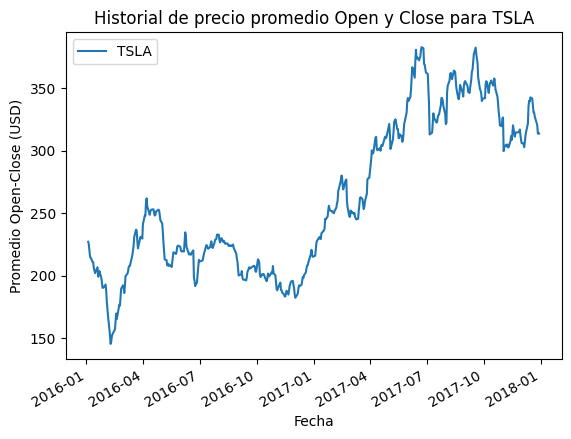

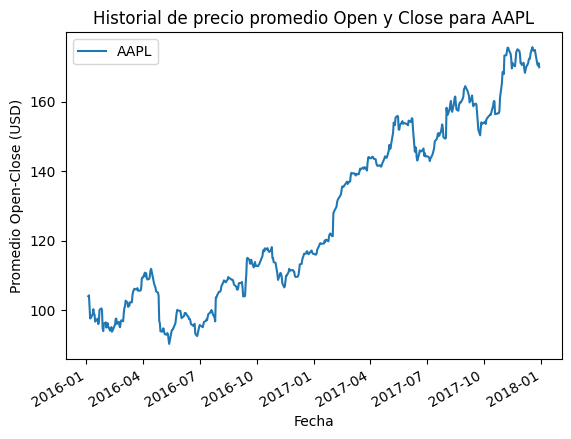

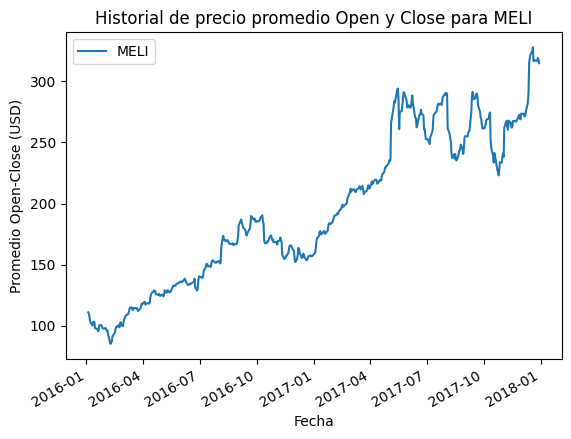

In [ ]:
# GRAFICO SOBRE 3 ACCIONES DE INTERÉS POR SEPARADO (TSLA, AAPL y MELI)
acciones_interes = ["TSLA", "AAPL", "MELI"]  # lista de acciones elegidas para graficar

# Gráficos individuales para cada acción
for accion in acciones_interes:
    df_accion = df_stocks[df_stocks["Stock"] == accion]  # Filtrar por acción
    df_accion["Promedio_Open_Close"].plot(label=accion)  # Graficar el promedio por acción
    plt.title(f"Historial de precio promedio Open y Close para {accion}")
    plt.xlabel("Fecha")
    plt.ylabel("Promedio Open-Close (USD)")
    plt.legend()
    plt.show()

In [ ]:
# CONSIDERACIONES PREVIAS: Se llevó a cabo un análisis de splits para verificar si las caídas en los precios de las acciones observadas en los gráficos eran consecuencia de estos eventos.
# Los resultados mostraron que Apple no realizó splits en el período analizado (sino el 28/02/2005 Split de 2:1, 09/06/2014 Split de 7:1 y 31/08/2020 Split de 4:1).
# En el caso de Tesla, tampoco se produjeron splits dentro del período analizado (sino el 31/08/2020 Split de 5:1 y 25/08/2022 Split de 3:1).
# Sorprendentemente MercadoLibre JAMÁS hizo splits a la fecha.
# Esto indica que las caídas observadas en los gráficos no están relacionadas con splits y podrían deberse a otras causas del mercado.

# CONCLUSIONES:
# Tesla refleja un crecimiento acelerado que evidencia las expectativas del mercado por su innovación en el sector automotriz eléctrico. Pre-elecciones (a inicios del 2016) sufre una caída importante en el precio promedio, pero luego de las elecciones mejora muchísimo su cotización.
# Apple presenta un crecimiento más estable y progresivo, con una pendiente positiva constante en el tiempo. Esto podría vincularse al prestigio líder en tecnología, respaldada por lanzamientos consistentes y una base de clientes fidelizada. En consecuencia, no se observan comportamientos bruscos en el mercado producto de las elecciones, sino más bien a épocas festivas como navidad, año nuevo, etc.
# MercadoLibre muestra un incremento constante y sostenido pero no tan progresivo como Apple. Previo a las elecciones se observa una caída, aunque mantiene una tendencia positiva y luego refuerza su crecimiento.

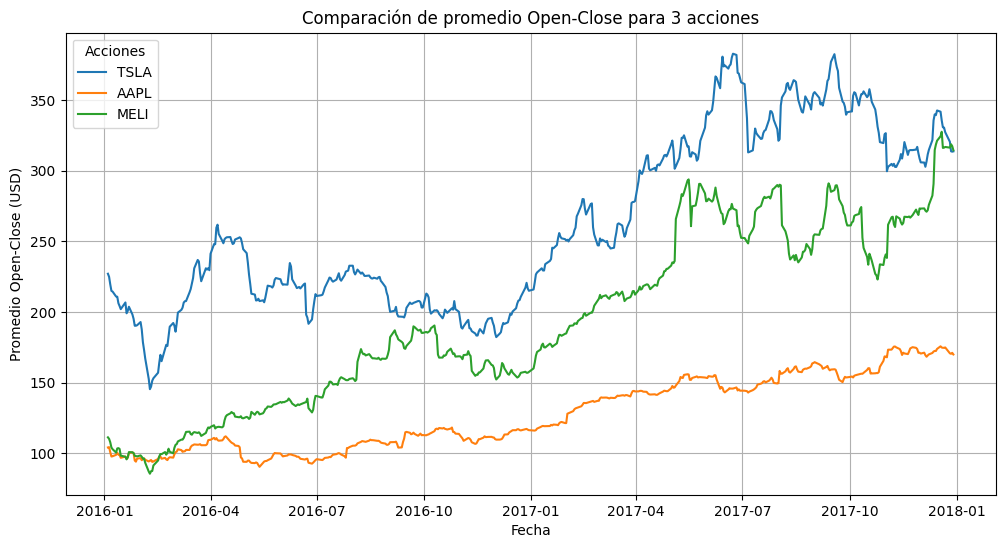

In [ ]:
# GRAFICAR TRES ACCIONES JUNTAS EN EL MISMO GRÁFICO (colabora en la comparación)
acciones_interes = ["TSLA", "AAPL", "MELI"]

# Crear gráfico combinado
plt.figure(figsize=(12, 6))
for accion in acciones_interes:
    df_accion = df_stocks[df_stocks["Stock"] == accion]  # Filtrar por acción
    plt.plot(df_accion.index, df_accion["Promedio_Open_Close"], label=accion)  # Graficar promedio

# Configuración del gráfico
plt.title("Comparación de promedio Open-Close para 3 acciones")
plt.xlabel("Fecha")
plt.ylabel("Promedio Open-Close (USD)")
plt.legend(title="Acciones")
plt.grid()
plt.show()

In [ ]:
# CONCLUSIONES GENERALES: Aunque se trata de tres empresas con actividades muy diferentes, las tres muestran comportamientos diferenciados, lo que refleja la naturaleza de sus industrias y los factores específicos que las afectan.
# Tesla destaca por su volatilidad, mientras que Apple y MercadoLibre presentan un crecimiento más uniforme, con influencia de eventos externos como las elecciones y las temporadas de consumo.
# En síntesis, los efectos de las elecciones presidenciales de 2016 fueron más significativos para empresas tecnológicas como Tesla, que se vieron impulsadas por las expectativas del mercado.

In [ ]:
# FILTRADO DE UNA EMPRESA "TSLA" PARA FUTURA PREDICCIÓN
df_accion = df_stocks[df_stocks["Stock"] == "TSLA"]
print("filtrado de TSLA con exito")

filtrado de TSLA con exito


In [ ]:
# Se elige Tesla dado que es la empresa que mayor volatilidad refleja con un crecimiento exponencial muy respaldado por las expectativas del mercado y confianza en su innovación tecnológica.

In [ ]:
# RESETEO DEL ÍNDICE
df_accion.reset_index(inplace=True)
print("reseteo exitoso")

reseteo exitoso


In [ ]:
# SE FILTRAN COLUMNAS FECHA Y PRECIO PARA LIMITAR EL ALCANCE DEL ANÁLISIS SOBRE TSLA
df_accion = df_accion[["date", "Promedio_Open_Close"]]
df_accion

,date,Promedio_Open_Close
0,2016-01-04,227.065
1,2016-01-05,224.895
2,2016-01-06,219.520
3,2016-01-07,214.920
4,2016-01-08,214.430
...,...,...
498,2017-12-22,327.355
499,2017-12-26,320.560
500,2017-12-27,313.820
501,2017-12-28,313.555


In [ ]:
# INSTALACIÓN DE LIBRERIA tensorflow especifica para deep learning
!pip install tensorflow # utilizada para crear, entrenar y hacer predicciones con red neuronal que se creará
print("instalación de tensorflow exitosa")

instalación de tensorflow exitosa


In [ ]:
# IMPORTACIÓN DE OTRAS LIBRERIAS
import numpy as np # para hacer cálculos aritméticos
print("importación de numpy exitosa")
from sklearn.preprocessing import MinMaxScaler # importación de la clase MinMaxScaler de la libreria sklearn del módulo preprocessing
print("importación de MinMaxScaler exitosa")

#IMPORTACIONES PARA CREACIÓN DE RED NEURONAL
from tensorflow.keras.models import Sequential
print("importación de tensorflow.keras.models Sequential exitosa")
from tensorflow.keras.layers import Dense, SimpleRNN, Reshape
print("importación de tensorflow.keras.layers,etc. exitosa")

importación de numpy exitosa
importación de MinMaxScaler exitosa
importación de tensorflow.keras.models Sequential exitosa
importación de tensorflow.keras.layers,etc. exitosa


In [ ]:
data = df_accion.copy() # copia del dataframe como buena práctica
data # para corroborar el copiado satisfactorio

,date,Promedio_Open_Close
0,2016-01-04,227.065
1,2016-01-05,224.895
2,2016-01-06,219.520
3,2016-01-07,214.920
4,2016-01-08,214.430
...,...,...
498,2017-12-22,327.355
499,2017-12-26,320.560
500,2017-12-27,313.820
501,2017-12-28,313.555


In [ ]:
data["date"] = pd.to_datetime(data["date"]) # transformación de columna date a tipo de fecha
data = data[data["date"] < "2016-11-09"]  # fecha de las elecciones, para analisis de comportamiento previo al acontecimiento
data # para corroborar el rango de fechas

,date,Promedio_Open_Close
0,2016-01-04,227.065
1,2016-01-05,224.895
2,2016-01-06,219.520
3,2016-01-07,214.920
4,2016-01-08,214.430
...,...,...
211,2016-11-02,189.035
212,2016-11-03,188.210
213,2016-11-04,189.780
214,2016-11-07,193.400


In [ ]:
data.sort_values(by="date", inplace=True) # ordenamiento según fecha del dataframe como buena práctica

scaler = MinMaxScaler()
data["scaled"] = scaler.fit_transform(data[["Promedio_Open_Close"]]) # escala de los datos

def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i:i+seq_length])
  return np.array(X), np.array(y)

sequence_lenght = 7 # Horizonte de predicción no muy extenso para mayor precisión
X,y = create_sequences(data["scaled"].values, sequence_lenght)

split = int(0.8 * len(data))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential([
    Reshape((sequence_lenght,1), input_shape=(sequence_lenght,)),
    SimpleRNN(256),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse") # model es el objeto entrenado

history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.1) # se deja el 0.1 para ver la iteración en la respuesta

predictions = [] # lista en la que se guardarán las predicciones

last_sequence = X_test[-1]
for _ in range(7):
  prediction = model.predict(last_sequence.reshape(1,-1,1))[0, 0]
  predictions.append(prediction)
  last_sequence = np.append(last_sequence[1:], prediction)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1,1)).flatten() # aplicación de inversa scaler para interpretar correcto
last_date = data["date"].iloc[-1]
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7) # generación de fechas futuras

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - loss: 0.2454 - val_loss: 0.0020
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0228 - val_loss: 0.0625
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0554 - val_loss: 0.0017
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0080 - val_loss: 0.0335
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0276 - val_loss: 0.0043
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0047 - val_loss: 0.0077
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0135 - val_loss: 0.0085
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0112 - val_loss: 0.0015
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0039 - val_loss: 0.0074
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0080 - val_loss: 0.0052
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0054 - val_loss: 0.0015
Epoch 12/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 13/25

In [ ]:
next_dates # se observan las fechas de las predicciones

DatetimeIndex(['2016-11-09', '2016-11-10', '2016-11-11', '2016-11-12',
               '2016-11-13', '2016-11-14', '2016-11-15'],
              dtype='datetime64[ns]', freq='D')

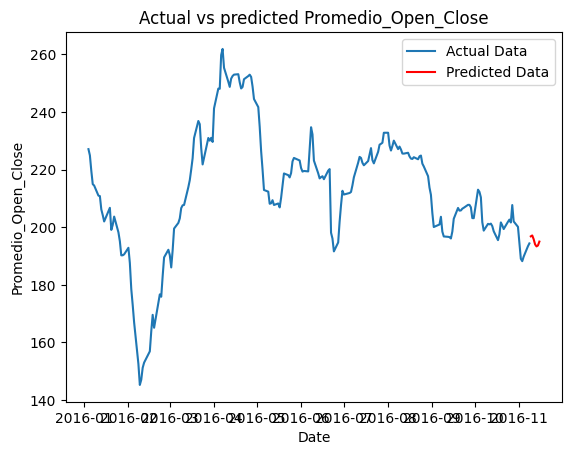

In [ ]:
# GRAFICO DE LA PREDICCIÓN
plt.plot(data["date"], data["Promedio_Open_Close"], label="Actual Data")
plt.plot(next_dates, predictions, label="Predicted Data", color='red') # decidí elegir el color rojo
plt.xlabel("Date")
plt.ylabel("Promedio_Open_Close")
plt.title("Actual vs predicted Promedio_Open_Close")
plt.legend()
plt.show()

In [ ]:
# CONCLUSIÓN SOBRE LA PREDICCIÓN:
# Se decidió basar el análisis predictivo en los 7 días posteriores a las elecciones, y se comprueba que la predicción fué atinada, puesto que Tesla incrementó su precio promedio y por lo tanto se alinea con la tendencia observada en los datos reales. Este comportamiento podría estar relacionado con un aumento en la confianza de los inversionistas hacia la compañía tras las elecciones.